<center>

<h1>Master en Management & Analytics</h1>
</center>

            

### Alumno: Priolo Juan

# <span style="color:blue"> Introducción 

En esta **Notebook** se utilizarán distintos modelos de ML para predecir la fluencia del acero. Para ellos se tomará el DATASET generado.

**Objetivos generales del proyecto:**

a) Análisis Exploratorio de los datos que nos permitirá una mejor interpretación de la información
b) Comparar diferentes modelos de Machine Learning utilizando diferentes métricas para ellos (MSE y R2)

A continuación se irán describiendo diferentes etapas.

## <span style="color:blue"> Etapa 2 - Modelos de Machine Learning

Importando el DATASET, analizaremos la información

#### 0.a) - Importamos a continuación el DATASET generado en la NOTEBOOK 1

file_path = 'C:/Users/60056808/Desktop/Trabajo Final Magister/TP final Maestria MMA/3. Programa Python en Jupyter/Datos/dataset_final.csv' 



In [6]:
import pandas as pd

# Ruta al archivo .csv
#file_path = 'C:/Users/60056808/Desktop/Trabajo Final Magister/TP final Maestria MMA/3. Programa Python en Jupyter/Datos/DATASET.csv'

file_path = 'C:/Users/60056808/Desktop/Trabajo Final Magister/TP final Maestria MMA/Jupyter avances/data/dataset_final.csv'

# Leer el archivo .csv
DATASET = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
DATASET.head(10)

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Nb + Ta,Temperatura (°C),Rotura (MPa),Alargamiento (%),Reducción de área (%),Fluencia (MPa)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,27,490,30,71,342
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,100,454,27,72,338
2,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,200,465,23,69,337
3,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,300,495,21,70,346
4,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,400,489,26,79,316
5,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,450,461,25,81,287
6,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,500,431,28,85,274
7,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,550,387,32,87,262
8,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,600,314,42,88,220
9,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,650,226,59,92,152


In [7]:
# Ajustar opciones para mostrar toda la información
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)     # Mostrar todas las filas

# Mostrar la información del DataFrame
DATASET.info()

# Restablecer opciones (opcional)
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   C                      909 non-null    float64
 1   Si                     909 non-null    float64
 2   Mn                     909 non-null    float64
 3   P                      909 non-null    float64
 4   S                      909 non-null    float64
 5   Ni                     909 non-null    float64
 6   Cr                     909 non-null    float64
 7   Mo                     909 non-null    float64
 8   Cu                     909 non-null    float64
 9   V                      909 non-null    float64
 10  Al                     909 non-null    float64
 11  N                      909 non-null    float64
 12  Nb + Ta                909 non-null    float64
 13  Temperatura (°C)       909 non-null    int64  
 14  Rotura (MPa)           909 non-null    int64  
 15  Alarga

In [8]:
import pandas as pd


# Calcular los cuartiles
Q1 = DATASET['Rotura (MPa)'].quantile(0.25)
Q3 = DATASET['Rotura (MPa)'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para eliminar outliers
DATASET = DATASET[(DATASET['Rotura (MPa)'] >= lower_bound) & (DATASET['Rotura (MPa)'] <= upper_bound)]

# Elijo las variables predictoras como X

In [9]:
atributos_seleccionados_X = ['C', 'Si', 'Mn', 'P', 'S', 'Ni', 'Cr', 'Mo', 'Cu', 
                             'V', 'Al', 'N', 'Nb + Ta', 'Temperatura (°C)']

X = DATASET[atributos_seleccionados_X]
X.head(2)

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Nb + Ta,Temperatura (°C)
0,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,27
1,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,100


# Elijo la variable a predecir como y

In [12]:
atributos_seleccionados_y = ['Fluencia (MPa)'] #, 'Rotura Obt. (MPa)','Alarg. Obt. (%)']
y = DATASET[atributos_seleccionados_y]
y.head(5)

,Fluencia (MPa)
0,342
1,338
2,337
3,346
4,316


## Acá comienzo con lo necesario para correr el modelo

##### Divido en 0.7 training y 0.3 test

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Construyo la RN con 3 capas

C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
14/14 - 2s - 177ms/step - loss: 125991.4453 - val_loss: 125495.8203
Epoch 2/100
14/14 - 0s - 12ms/step - loss: 125142.1953 - val_loss: 124599.4531
Epoch 3/100
14/14 - 0s - 12ms/step - loss: 124092.7734 - val_loss: 123365.4844
Epoch 4/100
14/14 - 0s - 12ms/step - loss: 122589.2734 - val_loss: 121647.6094
Epoch 5/100
14/14 - 0s - 13ms/step - loss: 120475.5938 - val_loss: 119165.5312
Epoch 6/100
14/14 - 0s - 12ms/step - loss: 117417.2734 - val_loss: 115793.0469
Epoch 7/100
14/14 - 0s - 14ms/step - loss: 113433.3047 - val_loss: 111298.5234
Epoch 8/100
14/14 - 0s - 14ms/step - loss: 108069.4531 - val_loss: 105598.3672
Epoch 9/100
14/14 - 0s - 12ms/step - loss: 101336.4062 - val_loss: 98490.3125
Epoch 10/100
14/14 - 0s - 11ms/step - loss: 93234.8906 - val_loss: 89899.4688
Epoch 11/100
14/14 - 0s - 12ms/step - loss: 83560.6797 - val_loss: 80136.5938
Epoch 12/100
14/14 - 0s - 11ms/step - loss: 72736.0391 - val_loss: 69455.3828
Epoch 13/100
14/14 - 0s - 12ms/step - loss: 61341.8633 

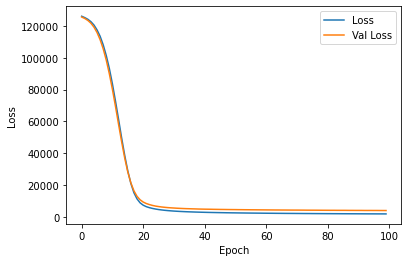

In [16]:
# Construir la red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Salida para la regresión, sin activación

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.3, verbose=2)

# Evaluar el modelo
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio en el conjunto de prueba: {mse}')


# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de determinación R^2: {r2}')


# Opcional: graficar el historial de entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Interpretación del Gráfico de Loss vs Epoch
Eje Y (Pérdida o Loss):

Representa el valor de la función de pérdida en cada época. La función de pérdida mide qué tan bien está funcionando el modelo; valores más bajos indican un mejor desempeño.
Eje X (Épocas o Epochs):

Representa el número de épocas, que es el número de veces que el modelo ha visto todo el conjunto de datos de entrenamiento.
Puntos Clave para Interpretar el Gráfico
Tendencia General:

Disminución Continua: Idealmente, la pérdida debería disminuir a medida que aumentan las épocas, lo que indica que el modelo está aprendiendo y ajustando sus parámetros para mejorar el rendimiento en los datos de entrenamiento.
Estabilización: En algún punto, la pérdida puede estabilizarse y dejar de disminuir. Esto puede significar que el modelo ha alcanzado su capacidad de aprendizaje o que es necesario ajustar otros hiperparámetros.
Sobreajuste (Overfitting):

Divergencia o Aumento en la Pérdida: Si la pérdida de entrenamiento continúa disminuyendo mientras que la pérdida en el conjunto de validación aumenta, esto sugiere sobreajuste. El modelo está aprendiendo demasiado bien los datos de entrenamiento y no generaliza bien a datos nuevos.
Separación de Pérdida de Entrenamiento y Validación: Un gran gap entre la pérdida de entrenamiento y la pérdida de validación indica que el modelo puede estar sobreajustado. En estos casos, es útil utilizar técnicas como regularización, dropout, o aumentar el tamaño del conjunto de datos.
Convergencia y Estabilidad:

Convergencia Rápida: Si la pérdida disminuye rápidamente al principio y luego se estabiliza, esto puede indicar que el modelo está aprendiendo eficientemente. Sin embargo, si la pérdida es inestable y oscila mucho, puede ser necesario ajustar la tasa de aprendizaje o revisar el diseño del modelo.
Oscilaciones o Picos: Oscilaciones en la pérdida pueden ser un indicio de que la tasa de aprendizaje es demasiado alta. Intenta reducirla y observar si el comportamiento mejora.
Pérdida en Épocas Iniciales vs Finales:

Rápida Reducción Inicial: Una disminución rápida en las primeras épocas es normal y muestra que el modelo está haciendo ajustes iniciales significativos.
Estabilización Final: A medida que el entrenamiento avanza, las disminuciones en la pérdida pueden volverse más lentas y estables. Esto indica que el modelo está ajustando los parámetros finos.

### Construyo la RN con 6 capas


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 133362.1250 - val_loss: 110493.9062
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 86487.7812 - val_loss: 11427.6387
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17664.7207 - val_loss: 12288.7168
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8457.8496 - val_loss: 6553.6206
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3617.1406 - val_loss: 5831.9321
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3433.1357 - val_loss: 5212.7993
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2597.6870 - val_loss: 5075.5103
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2863.5325 - val_loss: 4924.4653
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2396.6970 - val_loss: 4834.6587
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2233.2854 - val_loss: 4785.3740
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2531.8281 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 420.8344 - val_loss: 2280.3271
Epoch 66/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 527.7798 - val_loss: 2295.6804
Epoch 67/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 412.1254 - val_loss: 2159.3877
Epoch 68/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 399.8650 - val_loss: 2223.3364
Epoch 69/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 483.1519 - val_loss: 2280.2126
Epoch 70/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 421.1295 - val_loss: 2149.4248
Epoch 71/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 406.6748 - val_loss: 2239.8125
Epoch 72/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 446.9060 - val_loss: 2225.9453
Epoch 73/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 358.0565 - val_loss: 2110.0046
Epoch 74/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 323.1680 - val_loss: 2127.9497
Epoch 75/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 340.0677 - val_loss: 2114.6475
E

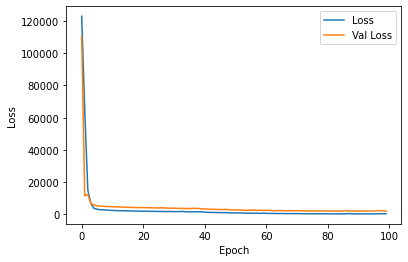

In [17]:
# Construir la red neuronal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

model = Sequential()

# Capa de entrada y primera capa oculta
model.add(Dense(512, input_dim=X_train_scaled.shape[1], activation='relu'))  # Aumentamos a 128 neuronas

# Capas ocultas adicionales
model.add(Dense(256, activation='relu'))  # Segunda capa oculta
model.add(Dense(128, activation='relu'))  # Segunda capa oculta
model.add(Dense(64, activation='relu'))  # Segunda capa oculta
model.add(Dense(32, activation='relu'))  # Tercera capa oculta
model.add(Dense(16, activation='relu'))  # Cuarta capa oculta para mayor profundidad

# Capa de salida
model.add(Dense(1))  # Salida para la regresión, sin activación

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.3, verbose=1)

# Evaluar el modelo
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Error Cuadrático Medio en el conjunto de prueba: {mse}')

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de determinación R^2: {r2}')

# Opcional: graficar el historial de entrenamiento
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Agrego Grid Search y Cross Validation (ojo que tarda)

Instalo scikeras

In [48]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: keras>=3.2.0 in c:\users\60056808\anaconda3\lib\site-packages (from scikeras) (3.4.1)



In [49]:
import scikeras
print(scikeras.__version__)

0.13.0


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.base import BaseEstimator, RegressorMixin

# Definir una clase personalizada para KerasRegressor
class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, optimizer='adam', neurons1=64, neurons2=32, epochs=100, batch_size=32):
        self.optimizer = optimizer
        self.neurons1 = neurons1
        self.neurons2 = neurons2
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None
    
    def build_model(self):
        model = Sequential()
        model.add(Dense(self.neurons1, input_dim=X_train_scaled.shape[1], activation='relu'))
        model.add(Dense(self.neurons2, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer=self.optimizer, loss='mean_squared_error')
        return model
    
    def fit(self, X, y):
        self.model_ = self.build_model()
        self.history_ = self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self
    
    def predict(self, X):
        return self.model_.predict(X).flatten()

# Definir parámetros para GridSearch
param_grid = {
    'neurons1': [32, 64, 128],
    'neurons2': [16, 32, 64],
    'optimizer': ['adam', 'rmsprop'],
    'epochs': [50, 100],
    'batch_size': [16, 32]
}

# Configurar GridSearchCV con validación cruzada
grid_search = GridSearchCV(estimator=CustomKerasRegressor(),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=2)

# Ejecutar la búsqueda en cuadrícula
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores parámetros
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor MSE: {-grid_search.best_score_}")

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE) en el conjunto de prueba: {mse}')
print(f'Coeficiente de determinación R^2: {r2}')


Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=16, optimizer=adam; total time=   8.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/stepWARNING:tensorflow:5 out of the last 17 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000019251FAA040> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=16, optimizer=adam; total time=   9.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=16, optimizer=adam; total time=   8.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=16, optimizer=adam; total time=   8.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=16, optimizer=adam; total time=  10.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   8.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   8.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   8.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   8.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   9.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=32, optimizer=adam; total time=   8.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=32, optimizer=adam; total time=   8.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=32, optimizer=adam; total time=   8.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=32, optimizer=adam; total time=   8.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=32, optimizer=adam; total time=   8.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=32, optimizer=rmsprop; total time=   7.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=32, optimizer=rmsprop; total time=   7.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=32, optimizer=rmsprop; total time=   7.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=32, optimizer=rmsprop; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=32, optimizer=rmsprop; total time=   8.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=64, optimizer=adam; total time=   8.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=64, optimizer=adam; total time=   8.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=64, optimizer=adam; total time=   9.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=64, optimizer=adam; total time=   8.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=64, optimizer=adam; total time=   8.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=64, optimizer=rmsprop; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=64, optimizer=rmsprop; total time=   8.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=64, optimizer=rmsprop; total time=   8.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=64, optimizer=rmsprop; total time=   8.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[CV] END batch_size=16, epochs=50, neurons1=32, neurons2=64, optimizer=rmsprop; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=16, optimizer=adam; total time=   8.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=16, optimizer=adam; total time=   7.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=16, optimizer=adam; total time=   7.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=16, optimizer=adam; total time=   8.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=16, optimizer=adam; total time=   8.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=16, optimizer=rmsprop; total time=   8.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=16, optimizer=rmsprop; total time=   8.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=16, optimizer=rmsprop; total time=   8.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=16, optimizer=rmsprop; total time=   8.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=16, optimizer=rmsprop; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=32, optimizer=adam; total time=   8.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=32, optimizer=adam; total time=   8.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=32, optimizer=adam; total time=   8.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=32, optimizer=adam; total time=   9.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=32, optimizer=adam; total time=   7.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=32, optimizer=rmsprop; total time=   7.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=32, optimizer=rmsprop; total time=   8.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=32, optimizer=rmsprop; total time=   8.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=32, optimizer=rmsprop; total time=   7.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=32, optimizer=rmsprop; total time=   8.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=64, optimizer=adam; total time=   8.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=64, optimizer=adam; total time=   9.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=64, optimizer=adam; total time=  10.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=64, optimizer=adam; total time=   8.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=64, optimizer=adam; total time=   9.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=64, optimizer=rmsprop; total time=   8.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=64, optimizer=rmsprop; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=64, optimizer=rmsprop; total time=   7.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=64, optimizer=rmsprop; total time=   8.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[CV] END batch_size=16, epochs=50, neurons1=64, neurons2=64, optimizer=rmsprop; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=16, optimizer=adam; total time=   8.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=16, optimizer=adam; total time=   8.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=16, optimizer=adam; total time=   8.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=16, optimizer=adam; total time=   8.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=16, optimizer=adam; total time=   9.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=16, optimizer=rmsprop; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=16, optimizer=rmsprop; total time=   8.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=16, optimizer=rmsprop; total time=   7.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=16, optimizer=rmsprop; total time=   7.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=16, optimizer=rmsprop; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=32, optimizer=adam; total time=   8.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=32, optimizer=adam; total time=   8.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=32, optimizer=adam; total time=   9.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=32, optimizer=adam; total time=   9.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=32, optimizer=adam; total time=   8.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=32, optimizer=rmsprop; total time=   8.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=32, optimizer=rmsprop; total time=   8.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=32, optimizer=rmsprop; total time=   7.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=32, optimizer=rmsprop; total time=   8.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=32, optimizer=rmsprop; total time=   8.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=64, optimizer=adam; total time=   9.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=64, optimizer=adam; total time=   9.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=64, optimizer=adam; total time=   9.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=64, optimizer=adam; total time=   9.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=64, optimizer=adam; total time=   9.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=64, optimizer=rmsprop; total time=   7.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=64, optimizer=rmsprop; total time=   7.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=64, optimizer=rmsprop; total time=   7.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=64, optimizer=rmsprop; total time=   5.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=50, neurons1=128, neurons2=64, optimizer=rmsprop; total time=   3.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=16, optimizer=adam; total time=   6.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=16, optimizer=adam; total time=   7.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=16, optimizer=adam; total time=   7.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=16, optimizer=adam; total time=   7.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=16, optimizer=adam; total time=   6.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   7.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   7.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   6.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   7.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   7.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=32, optimizer=adam; total time=   7.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=32, optimizer=adam; total time=   7.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=32, optimizer=adam; total time=   7.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=32, optimizer=adam; total time=   8.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=32, optimizer=adam; total time=   7.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=32, optimizer=rmsprop; total time=   8.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=32, optimizer=rmsprop; total time=   7.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=32, optimizer=rmsprop; total time=   7.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=32, optimizer=rmsprop; total time=   8.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=32, optimizer=rmsprop; total time=   7.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=64, optimizer=adam; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=64, optimizer=adam; total time=   7.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=64, optimizer=adam; total time=   7.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=64, optimizer=adam; total time=   7.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=64, optimizer=adam; total time=   6.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=64, optimizer=rmsprop; total time=   7.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=64, optimizer=rmsprop; total time=   7.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=64, optimizer=rmsprop; total time=   8.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=64, optimizer=rmsprop; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=32, neurons2=64, optimizer=rmsprop; total time=   7.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=16, optimizer=adam; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=16, optimizer=adam; total time=   7.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=16, optimizer=adam; total time=   8.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=16, optimizer=adam; total time=   8.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=16, optimizer=adam; total time=   7.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=16, optimizer=rmsprop; total time=   8.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=16, optimizer=rmsprop; total time=   8.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=16, optimizer=rmsprop; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=16, optimizer=rmsprop; total time=   8.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=16, optimizer=rmsprop; total time=   7.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=32, optimizer=adam; total time=   8.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=32, optimizer=adam; total time=   8.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=32, optimizer=adam; total time=   8.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=32, optimizer=adam; total time=   8.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=32, optimizer=adam; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=32, optimizer=rmsprop; total time=   7.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=32, optimizer=rmsprop; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=32, optimizer=rmsprop; total time=   6.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=32, optimizer=rmsprop; total time=   7.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=32, optimizer=rmsprop; total time=   7.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=64, optimizer=adam; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=64, optimizer=adam; total time=   8.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=64, optimizer=adam; total time=   9.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=64, optimizer=adam; total time=  10.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=64, optimizer=adam; total time=   9.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=64, optimizer=rmsprop; total time=   8.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=64, optimizer=rmsprop; total time=  12.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=64, optimizer=rmsprop; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=64, optimizer=rmsprop; total time=   6.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[CV] END batch_size=16, epochs=100, neurons1=64, neurons2=64, optimizer=rmsprop; total time=   7.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=16, optimizer=adam; total time=   8.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=16, optimizer=adam; total time=   8.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=16, optimizer=adam; total time=   9.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=16, optimizer=adam; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=16, optimizer=adam; total time=   8.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=16, optimizer=rmsprop; total time=   8.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=16, optimizer=rmsprop; total time=   8.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=16, optimizer=rmsprop; total time=   7.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=16, optimizer=rmsprop; total time=   7.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=16, optimizer=rmsprop; total time=   7.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=32, optimizer=adam; total time=   7.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=32, optimizer=adam; total time=   7.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=32, optimizer=adam; total time=   8.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=32, optimizer=adam; total time=   8.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=32, optimizer=adam; total time=   7.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=32, optimizer=rmsprop; total time=   7.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=32, optimizer=rmsprop; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=32, optimizer=rmsprop; total time=   7.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=32, optimizer=rmsprop; total time=   8.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=32, optimizer=rmsprop; total time=   7.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=64, optimizer=adam; total time=   8.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=64, optimizer=adam; total time=   8.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=64, optimizer=adam; total time=   7.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=64, optimizer=adam; total time=   7.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=64, optimizer=adam; total time=   8.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=64, optimizer=rmsprop; total time=   8.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=64, optimizer=rmsprop; total time=   7.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=64, optimizer=rmsprop; total time=   7.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=64, optimizer=rmsprop; total time=   7.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=16, epochs=100, neurons1=128, neurons2=64, optimizer=rmsprop; total time=   8.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=16, optimizer=adam; total time=   3.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=16, optimizer=adam; total time=   3.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=16, optimizer=adam; total time=   3.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=16, optimizer=adam; total time=   4.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=16, optimizer=adam; total time=   3.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   2.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   2.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   2.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   3.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   2.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=32, optimizer=adam; total time=   3.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=32, optimizer=adam; total time=   3.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=32, optimizer=adam; total time=   3.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=32, optimizer=adam; total time=   3.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=32, optimizer=adam; total time=   3.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=32, optimizer=rmsprop; total time=   3.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=32, optimizer=rmsprop; total time=   3.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=32, optimizer=rmsprop; total time=   3.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=32, optimizer=rmsprop; total time=   3.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=32, optimizer=rmsprop; total time=   3.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=64, optimizer=adam; total time=   3.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=64, optimizer=adam; total time=   3.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=64, optimizer=adam; total time=   4.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=64, optimizer=adam; total time=   3.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=64, optimizer=adam; total time=   3.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=64, optimizer=rmsprop; total time=   3.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=64, optimizer=rmsprop; total time=   3.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=64, optimizer=rmsprop; total time=   3.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=64, optimizer=rmsprop; total time=   3.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[CV] END batch_size=32, epochs=50, neurons1=32, neurons2=64, optimizer=rmsprop; total time=   3.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=16, optimizer=adam; total time=   3.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=16, optimizer=adam; total time=   3.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=16, optimizer=adam; total time=   3.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=16, optimizer=adam; total time=   3.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=16, optimizer=adam; total time=   3.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=16, optimizer=rmsprop; total time=   3.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=16, optimizer=rmsprop; total time=   3.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=16, optimizer=rmsprop; total time=   3.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=16, optimizer=rmsprop; total time=   3.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=16, optimizer=rmsprop; total time=   3.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=32, optimizer=adam; total time=   3.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=32, optimizer=adam; total time=   3.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=32, optimizer=adam; total time=   3.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=32, optimizer=adam; total time=   3.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=32, optimizer=adam; total time=   3.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=32, optimizer=rmsprop; total time=   3.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=32, optimizer=rmsprop; total time=   3.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=32, optimizer=rmsprop; total time=   3.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=32, optimizer=rmsprop; total time=   3.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=32, optimizer=rmsprop; total time=   3.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=64, optimizer=adam; total time=   3.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=64, optimizer=adam; total time=   3.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=64, optimizer=adam; total time=   3.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=64, optimizer=adam; total time=   3.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=64, optimizer=adam; total time=   4.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=64, optimizer=rmsprop; total time=   3.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=64, optimizer=rmsprop; total time=   3.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=64, optimizer=rmsprop; total time=   3.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=64, optimizer=rmsprop; total time=   3.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=64, neurons2=64, optimizer=rmsprop; total time=   3.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=16, optimizer=adam; total time=   3.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=16, optimizer=adam; total time=   3.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=16, optimizer=adam; total time=   3.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=16, optimizer=adam; total time=   5.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=16, optimizer=adam; total time=   3.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=16, optimizer=rmsprop; total time=   3.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=16, optimizer=rmsprop; total time=   3.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=16, optimizer=rmsprop; total time=   3.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=16, optimizer=rmsprop; total time=   4.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=16, optimizer=rmsprop; total time=   3.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=32, optimizer=adam; total time=   4.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=32, optimizer=adam; total time=   4.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=32, optimizer=adam; total time=   4.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=32, optimizer=adam; total time=   4.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=32, optimizer=adam; total time=   4.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=32, optimizer=rmsprop; total time=   3.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=32, optimizer=rmsprop; total time=   3.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=32, optimizer=rmsprop; total time=   3.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=32, optimizer=rmsprop; total time=   3.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=32, optimizer=rmsprop; total time=   3.2s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=64, optimizer=adam; total time=   4.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=64, optimizer=adam; total time=   3.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=64, optimizer=adam; total time=   3.6s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=64, optimizer=adam; total time=   3.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=64, optimizer=adam; total time=   3.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=64, optimizer=rmsprop; total time=   3.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=64, optimizer=rmsprop; total time=   3.0s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=64, optimizer=rmsprop; total time=   3.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=64, optimizer=rmsprop; total time=   2.8s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[CV] END batch_size=32, epochs=50, neurons1=128, neurons2=64, optimizer=rmsprop; total time=   3.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[CV] END batch_size=32, epochs=100, neurons1=32, neurons2=16, optimizer=adam; total time=   6.5s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[CV] END batch_size=32, epochs=100, neurons1=32, neurons2=16, optimizer=adam; total time=   5.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[CV] END batch_size=32, epochs=100, neurons1=32, neurons2=16, optimizer=adam; total time=   6.7s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=32, epochs=100, neurons1=32, neurons2=16, optimizer=adam; total time=   7.1s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[CV] END batch_size=32, epochs=100, neurons1=32, neurons2=16, optimizer=adam; total time=   6.4s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step
[CV] END batch_size=32, epochs=100, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   5.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[CV] END batch_size=32, epochs=100, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   5.3s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
[CV] END batch_size=32, epochs=100, neurons1=32, neurons2=16, optimizer=rmsprop; total time=   5.9s


C:\Users\60056808\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## <span style="color:blue"> Gradient Boosting Machine

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_scaled, y_train)# Definir y entrenar el modelo de Gradient Boosting


C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingRegressor(random_state=42)

In [28]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [29]:
# Calcular el coeficiente de determinación R^2 y el error cuadrático medio MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Coeficiente de determinación R^2: {r2}')
print(f'Error Cuadrático Medio (MSE): {mse}')

Coeficiente de determinación R^2: 0.9717036539703212
Error Cuadrático Medio (MSE): 453.6317667280297


## <span style="color:blue"> Agrego Grid Search y validación cruzada con 5 folds - (!) tarda en correr como 30 min

In [30]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=1)

# Ejecutar la búsqueda en cuadrícula
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores parámetros y resultados
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor MSE: {-grid_search.best_score_}")

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Coeficiente de determinación R^2 con mejores parámetros: {r2}')
print(f'Error Cuadrático Medio (MSE) con mejores parámetros: {mse}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\60056808\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Mejor MSE: 1011.1365958511476
Coeficiente de determinación R^2 con mejores parámetros: 0.9754073781598313
Error Cuadrático Medio (MSE) con mejores parámetros: 394.25565697171834


El argumento cv=5 indica que se realizará una validación cruzada con 5 pliegues (folds).

Proceso:

El conjunto de entrenamiento (X_train_scaled y y_train) se divide en 5 subconjuntos (o folds).
Durante cada iteración, el modelo se entrena en 4 de los subconjuntos y se valida en el subconjunto restante.
Este proceso se repite 5 veces, utilizando cada uno de los subconjuntos como conjunto de validación una vez.
Se calcula la métrica de evaluación (MSE negativo) en cada iteración y luego se promedian los resultados.
Selección del mejor modelo:

GridSearchCV utiliza la media de los resultados de la validación cruzada para cada combinación de hiperparámetros.
La combinación que obtiene el mejor puntaje promedio es seleccionada como la mejor.

### Pruebo con nuevas variables

In [35]:
# Nuevas variables para predecir
new_data = pd.DataFrame({
                     'C':                   [0.10, 0.10, 0.10, 0.10] ,
                     'Si':                  [0.001, 0.001, 0.001, 0.001],
                     'Mn':                  [0.50, 0.50, 0.50, 0.50],
                     'P':                   [0.001, 0.001, 0.001, 0.001],
                     'S':                   [0.0001, 0.0001, 0.0001, 0.0001],
                     'Ni':                  [0.001, 0.001, 0.001, 0.001],
                     'Cr':                  [0.10, 0.10, 0.10, 0.10],
                     'Mo':                  [0.08, 0.08, 0.08, 0.08],
                     'Cu':                  [0.05, 0.05, 0.05, 0.05],
                     'V':                   [0.05, 0.05, 0.05, 0.05],
                     'Al':                  [0.03, 0.03, 0.03, 0.03],
                     'N':                   [0.0001, 0.0001, 0.0001, 0.0001],
                     'Nb + Ta':             [0.0001, 0.0001, 0.0001, 0.0001],
                     'Temperatura (°C)':    [200, 300, 400, 500] })
    
    

In [36]:
new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)

In [37]:
# Intervalo de confianza al 95% (usando el error estándar de la predicción)
# Esto es una aproximación. Para un cálculo más riguroso, se necesita el intervalo de confianza del error.
from scipy.stats import norm

In [ ]:
import matplotlib.pyplot as plt
x_variable_for_plot = 'Temperatura (°C)'  # Reemplaza con la variable que deseas mostrar en el eje x
new_data[x_variable_for_plot] = [100, 300, 500, 700]  # Reemplaza con los valores para la variable en el eje x
#new_data_scaled = scaler.transform(new_data.drop(columns=[x_variable_for_plot]))
predictions = model.predict(new_data_scaled)

# Intervalo de confianza al 95% (usando el error estándar de la predicción)
confidence = 0.95
z_score = norm.ppf(1 - (1 - confidence) / 2)
error_margin = np.sqrt(mse) * z_score  # Aproximación del margen de error
predictions_with_interval = {
    'prediction': predictions.flatten(),
    'lower_bound': predictions.flatten() - error_margin,
    'upper_bound': predictions.flatten() + error_margin
}


# Valores límite
min_value = 270 #Reemplaza con tu valor límite mínimo 
#max_value =  # Reemplaza con tu valor límite máximo

# Visualización
plt.figure(figsize=(10, 6))
plt.errorbar(new_data[x_variable_for_plot],
             predictions_with_interval['prediction'],
             yerr=error_margin,
             fmt='o',
             capsize=5,
             label='Predicciones con Intervalo de Confianza')

plt.fill_between(new_data[x_variable_for_plot],
                 predictions_with_interval['lower_bound'],
                 predictions_with_interval['upper_bound'],
                 color='gray', alpha=0.2, label='Intervalo de Confianza 95%')

# Añadir líneas horizontales para los valores límite
plt.axhline(y=min_value, color='red', linestyle='--', label='Límite Mínimo')
#plt.axhline(y=max_value, color='blue', linestyle='--', label='Límite Máximo')

plt.xlabel(x_variable_for_plot)
plt.ylabel('Fluencia (Mpa)')
plt.title('Predicciones con Intervalo de Confianza al 95%')
plt.legend()
plt.show()